# Dependencies

In [1]:
import pandas as pd
import numpy as np
import json
import re
from nltk.corpus import stopwords
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Importing and Cleaning Data

In [2]:
df = pd.read_json("Data_cyb.json", lines = True, orient = "columns")

In [3]:
rating = []

for i in df["annotation"]:
    rating.append(int(i["label"][0]))
    
df["rating"] = rating

In [4]:
df.head()

,content,annotation,extras,rating
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [5]:
tweets = pd.read_csv("Test_Twitter_Comments.csv")
tweets.tail()

,content,rating
96,That is someone who does it from their heart. ...,1
97,Absolutely applaud your work to secure freedom...,0
98,You'll never learn it till you actually live i...,1
99,Nothing on the reinstatement of federal Capito...,1
100,Crickets,0


In [6]:
new_df1 = df[["content", "rating"]]

In [7]:
new_df = pd.concat([new_df1,tweets])

In [8]:
X, X_test, y, y_test = train_test_split(new_df["content"], new_df["rating"], train_size = 0.8)


In [9]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(X)
reviews_test_clean = preprocess_reviews(X_test)

# Baseline Model

Logistic regression model with just the removal of negligible symbols.

In [10]:
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(reviews_train_clean)
X_baseline = baseline_vectorizer.transform(reviews_train_clean)
X_test_baseline = baseline_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X_baseline, y, train_size = 0.5
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6659619450317125
Accuracy for C=0.05: 0.7032707374704639
Accuracy for C=0.25: 0.7510259917920656
Accuracy for C=0.5: 0.7693073000870538
Accuracy for C=1: 0.7829871906479293


### Has room to learn

# Remove Stop Words

In [11]:
from nltk.corpus import stopwords

In [12]:
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

In [13]:
no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)

cv = CountVectorizer(binary=True)
cv.fit(no_stop_words_train)
X = cv.transform(no_stop_words_train)
X_test = cv.transform(no_stop_words_test)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.664511315593136
Accuracy for C=0.05: 0.7177319074857
Accuracy for C=0.25: 0.7637403630937578
Accuracy for C=0.5: 0.7938323800049739
Accuracy for C=1: 0.8117383735389206


### Still has room to learn

# Normalization

# Stemming

In [14]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews_train = get_stemmed_text(reviews_train_clean)
stemmed_reviews_test = get_stemmed_text(reviews_test_clean)

cv = CountVectorizer(binary=True)
cv.fit(stemmed_reviews_train)
X = cv.transform(stemmed_reviews_train)
X_test = cv.transform(stemmed_reviews_test)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6779408107435961
Accuracy for C=0.05: 0.7100223824919174
Accuracy for C=0.25: 0.7582690872917185
Accuracy for C=0.5: 0.7784133300174086
Accuracy for C=1: 0.7913454364585923


### Still has room to learn

# Lemmatization

In [15]:
def get_lemmatized_text(corpus):
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews_train = get_lemmatized_text(reviews_train_clean)
lemmatized_reviews_test = get_lemmatized_text(reviews_test_clean)

cv = CountVectorizer(binary=True)
cv.fit(lemmatized_reviews_train)
X = cv.transform(lemmatized_reviews_train)
X_test = cv.transform(lemmatized_reviews_test)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6739617010693857
Accuracy for C=0.05: 0.7232031832877394
Accuracy for C=0.25: 0.7736881372792838
Accuracy for C=0.5: 0.7963193235513554
Accuracy for C=1: 0.8134792340213877


### Still has room to learn

# N-grams

In [16]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 4))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))
    
final_ngram = LogisticRegression(C=1)
final_ngram.fit(X, y)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_ngram.predict(X_test)))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.7224571002238249
Accuracy for C=0.05: 0.8291469783635912
Accuracy for C=0.25: 0.8744093509077344
Accuracy for C=0.5: 0.8749067396170107
Accuracy for C=1: 0.8756528226809251
Final Accuracy: 0.9196717234518776


### Still has room to learn

# Word Counts

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

wc_vectorizer = CountVectorizer(binary=False)
wc_vectorizer.fit(reviews_train_clean)
X = wc_vectorizer.transform(reviews_train_clean)
X_test = wc_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75, 
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.6732156180054713
Accuracy for C=0.05: 0.714250186520766
Accuracy for C=0.25: 0.769211638895797
Accuracy for C=0.5: 0.7968167122606317
Accuracy for C=1: 0.8147227057945785


### Still has room to learn

# Term Frequency-Inverse Document Frequency (TF-IDF)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(reviews_train_clean)
X = tfidf_vectorizer.transform(reviews_train_clean)
X_test = tfidf_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.6234767470778413
Accuracy for C=0.05: 0.6600348172096493
Accuracy for C=0.25: 0.7324048744093509
Accuracy for C=0.5: 0.7565282268092515
Accuracy for C=1: 0.7811489679184282


c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Still has room to learn

# Support Vector Machines (SVM)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.818950509823427
Accuracy for C=0.05: 0.8696841581696095
Accuracy for C=0.25: 0.8699328525242477
Accuracy for C=0.5: 0.8681919920417807
Accuracy for C=1: 0.8612285501119125


In [20]:
final_svm_ngram = LinearSVC(C=0.05)
final_svm_ngram.fit(X, y)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_svm_ngram.predict(X_test)))

Final Accuracy: 0.8957970654066153


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

Accuracy for C=0.01: 0.8530216364088535
Accuracy for C=0.05: 0.8756528226809251
Accuracy for C=0.25: 0.8699328525242477
Accuracy for C=0.5: 0.865456354140761
Accuracy for C=1: 0.8624720218851032


c:\users\ajkim\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
final_svm_ngram = LinearSVC(C=0.05)
final_svm_ngram.fit(X, y)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_svm_ngram.predict(X_test)))

Final Accuracy: 0.9089778662024373


# Naive Bayes

In [23]:
new_df.to_csv("./final_df.csv", index=False)

In [24]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("basics").getOrCreate()

In [25]:
from pyspark import SparkFiles

# Load in user_data.csv from S3 into a DataFrame
spark = SparkSession.builder.master("local").appName("CsvReader").getOrCreate()
spark_df = spark.read.format("csv").option("header", "true").load(r"./final_df.csv")

In [26]:
from pyspark.sql.types import IntegerType

spark_df = spark_df.withColumn("rating1", spark_df["rating"].cast(IntegerType()))
spark_df = spark_df.drop(spark_df.rating)
spark_df = spark_df.withColumnRenamed("rating1", "rating")

In [27]:
from pyspark.sql.functions import regexp_extract, length
review_df = spark_df.withColumnRenamed("rating", "label")\
      .withColumnRenamed("content", "review_text")\
      .select(["label", "review_text"])
review_df = review_df.withColumn('review_length', length(review_df['review_text'])).dropna()
review_df.cache()

DataFrame[label: int, review_text: string, review_length: int]

In [28]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF

# Create all the features to the data set
tokenizer = Tokenizer(inputCol="review_text", outputCol="token_text")
stopremove = StopWordsRemover(inputCol='token_text',outputCol='stop_tokens')
hashingTF = HashingTF(inputCol="token_text", outputCol='hash_token')
idf = IDF(inputCol='hash_token', outputCol='idf_token')

In [29]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector

# Create feature vectors
clean_up = VectorAssembler(inputCols=['idf_token', 'review_length'], outputCol='features')

In [30]:
# Create and run a data processing Pipeline
from pyspark.ml import Pipeline
data_prep_pipeline = Pipeline(stages=[tokenizer, stopremove, hashingTF, idf, clean_up])

In [31]:
# Fit and transform the pipeline
cleaner = data_prep_pipeline.fit(review_df)
cleaned = cleaner.transform(review_df)

In [32]:
# Break data down into a training set and a testing set
from pyspark.ml.classification import NaiveBayes
training, testing = cleaned.randomSplit([0.7, 0.3])

# Create a Naive Bayes model and fit training data
nb = NaiveBayes()
predictor = nb.fit(training)

In [33]:
# Tranform the model with the testing data
test_results = predictor.transform(testing)
test_results.show(5)

+-----+--------------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|label|         review_text|review_length|          token_text|         stop_tokens|          hash_token|           idf_token|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    0|   Santa is Itali...|           67|[, , , santa, is,...|[, , , santa, ita...|(262144,[15889,23...|(262144,[15889,23...|(262145,[15889,23...|[-799.45127258973...|[0.99999999999995...|       0.0|
|    0|  (: ahaha hii ce...|           22|[, , (:, ahaha, h...|[, , (:, ahaha, h...|(262144,[111315,1...|(262144,[111315,1...|(262145,[111315,1...|[-419.39507938371...|[0.93244733609704...|       

In [34]:
# Use the Class Evaluator for a cleaner description
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(test_results)
print("Accuracy of model at predicting reviews was: %f" % acc)

Accuracy of model at predicting reviews was: 0.811625


# Final Model

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords

In [36]:
stop_words = stopwords.words('english')
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3), stop_words=stop_words)
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.5
)

ccc = []
c_scores = []

for c in [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))
    ccc.append(c)
    c_scores.append(accuracy_score(y_val, svm.predict(X_val)))   

Accuracy for C=0.04: 0.8176843676159682
Accuracy for C=0.05: 0.8179330928988932
Accuracy for C=0.06: 0.8188036313891307
Accuracy for C=0.07: 0.8201716204452183
Accuracy for C=0.08: 0.8183061808232807
Accuracy for C=0.09: 0.8178087302574306
Accuracy for C=0.1: 0.8166894664842681
Accuracy for C=0.11: 0.8150727521452555
Accuracy for C=0.12: 0.8148240268623306
Accuracy for C=0.13: 0.814699664220868
Accuracy for C=0.14: 0.813953488372093
Accuracy for C=0.15: 0.8135804004477055


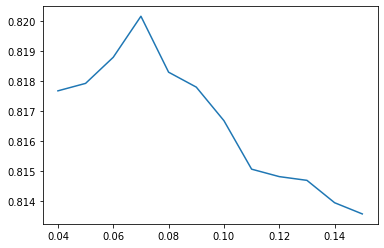

In [48]:
import matplotlib.pyplot as plt    
                    
plt.plot(ccc, c_scores)
plt.show()

# Let's test this baby out!

In [49]:
final = LinearSVC(tol=.000001,C=0.07)
final.fit(X, y)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final.predict(X_test)))

Final Accuracy: 0.895299676697339


In [50]:
tweets_list = [i[1]["content"] for i in tweets.iterrows()]
rating_list = [i[1]["rating"] for i in tweets.iterrows()]

In [51]:
twitter_cleaned = preprocess_reviews(tweets_list)
len(twitter_cleaned)

101

In [52]:
tws = ngram_vectorizer.transform(twitter_cleaned)
tws.shape

(101, 138540)

In [53]:
predictions = final.predict(tws[:100])

In [54]:
pd.DataFrame({"Prediction": predictions, "Actual": rating_list[:100]}).reset_index(drop=True).head()

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,0,1
4,1,1


In [55]:
total = 0
score = 0
for i, j in zip(predictions, rating_list):
    total += 1
    if i == j:
        score += 1
        
print(f"Accuracy: {score/total}")

Accuracy: 0.89


# Save & Load Model

In [56]:
from sklearn.externals import joblib

In [57]:
joblib.dump(final, "final_model_svc.pkl")

['final_model_svc.pkl']

In [58]:
try:
    retrieve_model = joblib.load("final_model_svc.pkl")
    print("using trained model")
except:
    print("model not found")
    joblib.dump(final, "final_model_svc.pkl")

using trained model
